# Purchase Analytics and Predictive Analysis

## Libraries

In [1]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Data Preparation

**Data Description**

The dataset consists of information about the purchases of chocolate candy bars of 500 individuals from a given area when entering a physical ‘FMCG’ store in the period of 2 years. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

**The description of the variables that were used in analysis**
<br>
**ID** _ Shows a unique identificator of a customer.
<br>
**Day** _ Day when the customer has visited the store 
<br>
**Incidence** _ Purchase Incidence
<br>
**Brand** _ Shows which brand the customer has purchased,  0 _ No brand was purchased, {1,2,3,4,5}	_ Brand ID
<br>
**Quantity** _ Number of items bought by the customer from the product category of interest
<br>
**{Price_1, Price_2, Price_3, Price_4, Price_5}** _ Price of an item from Brand 1, 2, 3, 4, 5 on a particular day
<br>
**{Promotion_1, Promotion_2, Promotion_3, Promotion_4, Promotion_5}** _ Indicator whether Brand 1, 2, 3, 4, 5 was on promotion or not on a particular day
<br>
**Segment_0** _ Standard
<br>
**Segment_1** _ Career-Focused
<br>
**Segment_2** _ Well-Off
<br>
**Segment_3** _ Fewer-Opportunities

In [70]:
#load data
df_pa = pd.read_csv('docs/purchase_analytics.csv')
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


## Purchase Probability Model

In order to predict we need input and output variables. 
Our Y is Incidence, as we want to predict the purchase probability for our customers


Our dependant variable is based on the average price of chocolate candy bars. Therefore, X is a data frame, containing the mean across the five prices.

In [3]:
Y = df_pa['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

### Probabilistic model

In [4]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
model_purchase.coef_

array([[-2.34787054]])

**The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.**

## Price Elasticity of Purchase Probability

Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
It informs the price range, for which we will be exploring purchase probability.

In [6]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


We introduce the price range for which we'll examine the purchase probability.
We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, which is from 1.1 to 2.8. 

In [7]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [8]:
df_price_range = pd.DataFrame(price_range)

Elasticity Formula
![](docs/elasticity.png)

## Calculate Prace Elasticity 

$E = (1-Y) * beta * P$

where: 
<br>
E - Elasticity <br>
Y - Purchase probability <br>
beta - Logistic Regression coeficient of Price <br>
P - Price <br>

## Calculate Brand Choice Cross Prace Elasticity 

$E = -beta(i) * P(j) *Y(j)$

where: 
<br>
E - Cross-price Elasticity <br>
Y(j) - Purchase probability for competitor brand product <br>
-beta(i) - Logistic Regression coeficient of the Price of **our** product <br>
P(j) - Price of the competitor brand product <br>

We predict the purchase probability for our newly defined price range. The result is a 2x300  array. The first column shows the probability for not purchasing the product, the second the probability for purchase for each price point in our price range.

In [9]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

Create price elasticities master data frame. It will contain all the elasticities we calculate during the purchase analytics part of the course.

In [10]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096408
1,0.51,-0.100476
2,0.52,-0.104672
3,0.53,-0.108997
4,0.54,-0.113456
...,...,...
295,3.45,-8.012241
296,3.46,-8.037489
297,3.47,-8.062703
298,3.48,-8.087883


In [11]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096408
1,0.51,-0.100476
2,0.52,-0.104672
3,0.53,-0.108997
4,0.54,-0.113456
5,0.55,-0.118051
6,0.56,-0.122786
7,0.57,-0.127665
8,0.58,-0.132690
9,0.59,-0.137865


We display the price elasticity of purchase probability of the average customer.
We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic. But to find the precise spot we can consult the price elasticities data frame.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

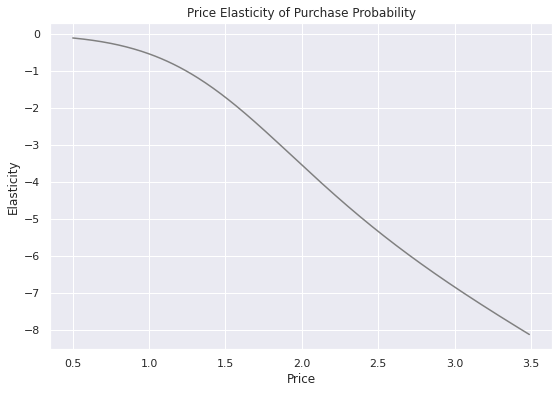

In [12]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability by Segments

### $\color{green}{\text{Segment 1 - Career-Focused}}$

We filter the data to contain only customers from segment 1, the career-focused. Again we want to predict the purchase probability, so our Y variable is the incidence column. Only here we select only the customers from the first segment.

In [13]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]
Y = df_pa_segment_1['Incidence']

We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.

In [14]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

X.head()

,Mean_Price
370,2.046
371,2.028
372,2.030
373,2.030
374,2.030


Fit logistic regression model

In [15]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35. This is an indicator, that this segment is less price sensitive compared to the average customer.

In [16]:
model_incidence_segment_1.coef_

array([[-1.71177165]])

Calculate Price Elasticity of the career-focused segment.

In [17]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

df_price_elasticities['PE_Segment_1'] = pe_segment_1

In [18]:
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096408,-0.119103
1,0.51,-0.100476,-0.123287
2,0.52,-0.104672,-0.127563
3,0.53,-0.108997,-0.131935
4,0.54,-0.113456,-0.136402


We plot the elasticities of the average customer and the career-focused segment side by side.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

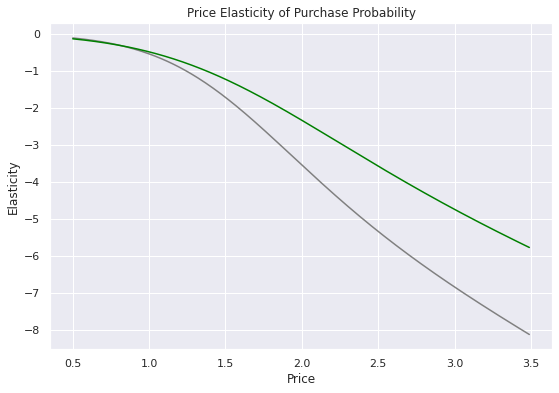

In [19]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Fewer-Opportunities}}$


Select only customers from segment 2, the fewer-opportunities.

In [20]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [21]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

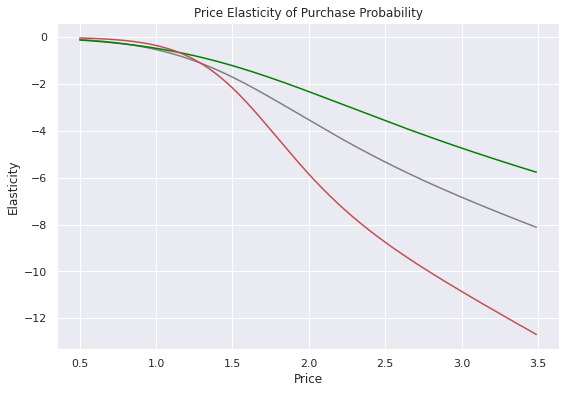

In [22]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{blue}{\text{Segment 0 - Standard}}$

In [23]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

### $\color{orange}{\text{Segment 3 - Well-Off}}$

In [24]:
# Select only customers from segment 3 
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185


### ${\textbf{Results}}$

We display all elasticities of purchase probability on the same plot. 
- We observe that the Career-focused segment are the least elastic when compared to the rest.  So, their purchase probability elasticity is not as affected by price.
- The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that the standard segment is least homogenous. It may be that the customers in this segment have different shopping habbits, which is why their  customers start with being more elastic than average but then shift to being more inelastic than the average customer and indeed the Career-focused segment.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

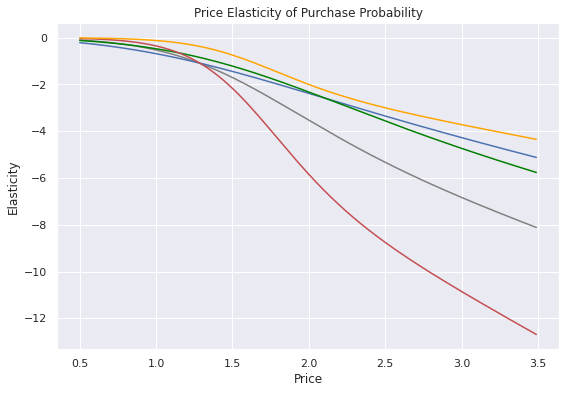

In [25]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [26]:
Y = df_pa['Incidence']

In [27]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability. We calculate the average promotion rate across the five brands. We add the mean price for the brands.

In [28]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

The coefficient for promotion is positive.Therefore, there is a positive relationship between promotion and purchase probability.

In [29]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49400797,  0.5613538 ]])

## Price Elasticity with Promotion

We create a data frame on which our model will predict. We need to include A price and promotion feature.
First, we'll include the price range as the price feature. Next, we'll include the promotion feature.

In [30]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.

In [31]:
df_price_elasticity_promotion['Promotion'] = 1
df_price_elasticity_promotion.head()

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1


In [32]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [33]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [34]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582,-0.125742
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187,-0.129858
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821,-0.134054
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487,-0.138329
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185,-0.142685
5,0.55,-0.118051,-0.245125,-0.140968,-0.040648,-0.013917,-0.147123
6,0.56,-0.122786,-0.252241,-0.145632,-0.042889,-0.014684,-0.151644
7,0.57,-0.127665,-0.259469,-0.150398,-0.045238,-0.015488,-0.156249
8,0.58,-0.132690,-0.266809,-0.155265,-0.047699,-0.016331,-0.160939
9,0.59,-0.137865,-0.274263,-0.160237,-0.050278,-0.017214,-0.165715


## Price Elasticity without Promotion

In [35]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

Promotion feature -No Promotion.
We assume there aren't any promotional activities on any of the price points.
We examine the elasticity of purchase probability when there isn't promotion.

In [36]:
df_price_elasticity_promotion_no['Promotion'] = 0
df_price_elasticity_promotion_no.head()

,Price_Range,Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0


In [37]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [38]:
no_promo = Y_no_promo[: , 1]

In [39]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

Update master data frame to include purchase probability elasticities without promotion.
We can now see the values with and without promotion and compare them for each price point in our price range.


In [40]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582,-0.125742,-0.195633
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187,-0.129858,-0.201754
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821,-0.134054,-0.207977
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487,-0.138329,-0.214304
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185,-0.142685,-0.220735


Plot purchase elasticities with and without promotion side by side for comprarisson.
Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
This is an important insight for marketers, as according to our model people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

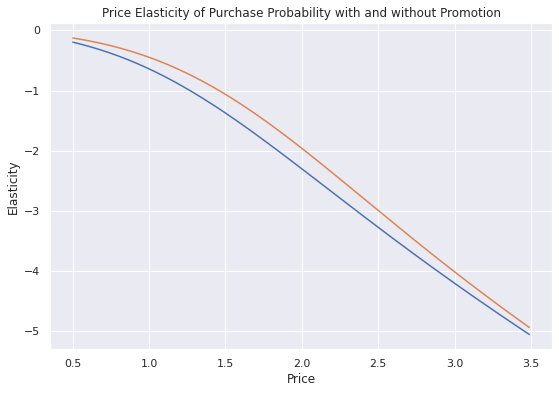

In [41]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## ${\textbf{Brand Choice}}$

### Data Preparation

Here we are interested in determining the brand choice of the customer. Hence, we filter our data, to include only purchase occasion, when a purchase has occured. 

In [42]:
brand_choice = df_pa[df_pa['Incidence'] == 1]
brand_choice.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [43]:
# Our model will predict the brand.
Y = brand_choice['Brand']

In [44]:
# Here we decide which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [45]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [46]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Here are the coeffictients for the model. We have five brands and five features for the price. 
# Therefore, this output is somewhat difficult to read.
model_brand_choice.coef_

array([[-3.91595258,  0.65846335,  2.41773908,  0.70408637, -0.20210624],
       [ 1.27461031, -1.87985465, -0.21265658, -0.20634148,  0.5878678 ],
       [ 1.62419059,  0.562105  ,  0.50090233,  1.03950872,  0.4527938 ],
       [ 0.57453377,  0.39558741, -1.4006231 , -1.24624506,  0.24934653],
       [ 0.44261791,  0.26369889, -1.30536173, -0.29100855, -1.08790189]])

In [48]:
# We create a pandas data frame, which contains to coefficients.
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915953,0.658463,2.417739,0.704086,-0.202106
1,1.274610,-1.879855,-0.212657,-0.206341,0.587868
2,1.624191,0.562105,0.500902,1.039509,0.452794
3,0.574534,0.395587,-1.400623,-1.246245,0.249347
4,0.442618,0.263699,-1.305362,-0.291009,-1.087902


In [49]:
# We make some transformations on the coefficients data frame to increase readability.
# We transpose the data frame, to keep with the conventional representation of results.
# We add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively. 
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [50]:
# We want to calculate price elasticity of brand choice.
# Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [51]:
# Brand Choice Model prediction.
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
predict_brand_5

array([[0.03290673, 0.02177653, 0.005438  , 0.0298882 , 0.90999055],
       [0.03316146, 0.02211914, 0.0055161 , 0.03025584, 0.90894746],
       [0.03341768, 0.02246683, 0.00559524, 0.03062757, 0.90789268],
       ...,
       [0.0688147 , 0.47570394, 0.07953556, 0.23889368, 0.13705212],
       [0.06852909, 0.47748674, 0.07972588, 0.23897862, 0.13527968],
       [0.06824254, 0.47926123, 0.07991415, 0.23905611, 0.13352598]])

Our model returns the probabilities of choosing each of the 5 brands. 
Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4, as we're starting to count from 0.

In [52]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]


In [53]:
# We're interested in choosing brand 5. 
# Therefore, the beta coefficient we require is that of the brand 5 coefficient and price 5.
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [54]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [55]:
# Adding the price elasticities to our master data frame. 
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582,-0.125742,-0.195633,-0.049055
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187,-0.129858,-0.201754,-0.050616
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821,-0.134054,-0.207977,-0.052206
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487,-0.138329,-0.214304,-0.053827
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185,-0.142685,-0.220735,-0.055477
5,0.55,-0.118051,-0.245125,-0.140968,-0.040648,-0.013917,-0.147123,-0.227271,-0.057158
6,0.56,-0.122786,-0.252241,-0.145632,-0.042889,-0.014684,-0.151644,-0.233912,-0.058870
7,0.57,-0.127665,-0.259469,-0.150398,-0.045238,-0.015488,-0.156249,-0.240660,-0.060614
8,0.58,-0.132690,-0.266809,-0.155265,-0.047699,-0.016331,-0.160939,-0.247516,-0.062390
9,0.59,-0.137865,-0.274263,-0.160237,-0.050278,-0.017214,-0.165715,-0.254479,-0.064199


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

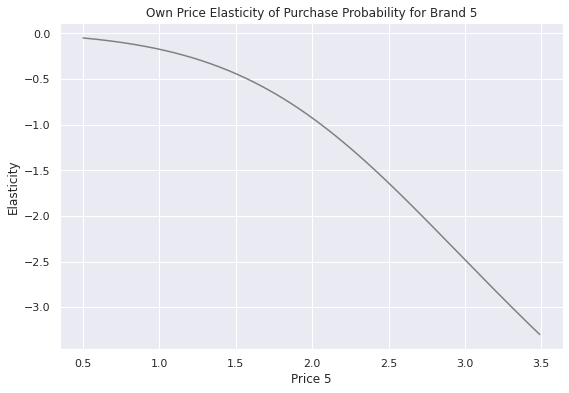

In [56]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

We want to examine the effect of the changes in price of a competitor brand.
We need to examine changes in the price of brand 4.
Keep in mind, we could examine the cross price elasticities for any of the remaining brands, we just need to update this data frame accordingly to contain the respective brand.

In [57]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [58]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [59]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [60]:
# As now we're interested in what the probability of choosing the competitor brand is, 
# we need to select the purchase probability for brand 4, contained in the 4th column with index 3. 
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [61]:
beta5

-1.09

The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand, further multiplied by the probability for choosing the cross brand.

In [62]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [63]:
# Update price elasticities data frame to include the cross price elasticities for brand 5 with respect to brand 4.
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582,-0.125742,-0.195633,-0.049055,0.332011
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187,-0.129858,-0.201754,-0.050616,0.337287
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821,-0.134054,-0.207977,-0.052206,0.342507
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487,-0.138329,-0.214304,-0.053827,0.347668
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185,-0.142685,-0.220735,-0.055477,0.352773
5,0.55,-0.118051,-0.245125,-0.140968,-0.040648,-0.013917,-0.147123,-0.227271,-0.057158,0.357820
6,0.56,-0.122786,-0.252241,-0.145632,-0.042889,-0.014684,-0.151644,-0.233912,-0.058870,0.362809
7,0.57,-0.127665,-0.259469,-0.150398,-0.045238,-0.015488,-0.156249,-0.240660,-0.060614,0.367741
8,0.58,-0.132690,-0.266809,-0.155265,-0.047699,-0.016331,-0.160939,-0.247516,-0.062390,0.372614
9,0.59,-0.137865,-0.274263,-0.160237,-0.050278,-0.017214,-0.165715,-0.254479,-0.064199,0.377429


Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4.
We observe they are positive. As the price of the competitor brand increases, so does the probability for purchasing our own brand.
Even though the elasticity starts to decrease from the 1.45 mark, it is still positive,signalling that the increase in purchase probability for the own brand happens more slowly.

Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

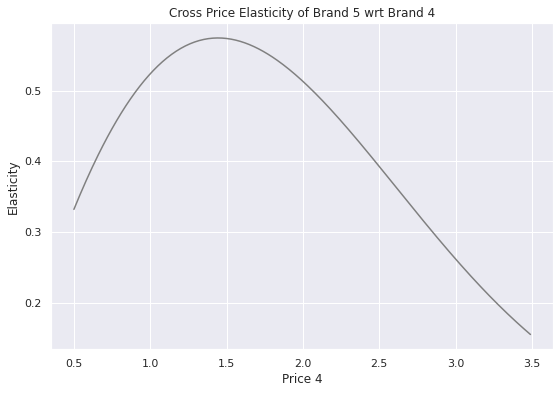

In [64]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

## Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [65]:
# We are interested in analysing the purchase probability for choosing brand 5 by segments.
# We filter our data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [66]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [67]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [68]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096408,-0.211189,-0.119103,-0.030908,-0.010582,-0.125742,-0.195633,-0.049055,0.332011,-0.297336,0.482421
1,0.51,-0.100476,-0.217759,-0.123287,-0.032675,-0.011187,-0.129858,-0.201754,-0.050616,0.337287,-0.303382,0.491726
2,0.52,-0.104672,-0.224437,-0.127563,-0.034528,-0.011821,-0.134054,-0.207977,-0.052206,0.342507,-0.309438,0.501016
3,0.53,-0.108997,-0.231223,-0.131935,-0.036472,-0.012487,-0.138329,-0.214304,-0.053827,0.347668,-0.315505,0.510290
4,0.54,-0.113456,-0.238119,-0.136402,-0.038510,-0.013185,-0.142685,-0.220735,-0.055477,0.352773,-0.321584,0.519548
5,0.55,-0.118051,-0.245125,-0.140968,-0.040648,-0.013917,-0.147123,-0.227271,-0.057158,0.357820,-0.327673,0.528791
6,0.56,-0.122786,-0.252241,-0.145632,-0.042889,-0.014684,-0.151644,-0.233912,-0.058870,0.362809,-0.333775,0.538017
7,0.57,-0.127665,-0.259469,-0.150398,-0.045238,-0.015488,-0.156249,-0.240660,-0.060614,0.367741,-0.339889,0.547227
8,0.58,-0.132690,-0.266809,-0.155265,-0.047699,-0.016331,-0.160939,-0.247516,-0.062390,0.372614,-0.346015,0.556421
9,0.59,-0.137865,-0.274263,-0.160237,-0.050278,-0.017214,-0.165715,-0.254479,-0.064199,0.377429,-0.352155,0.565598


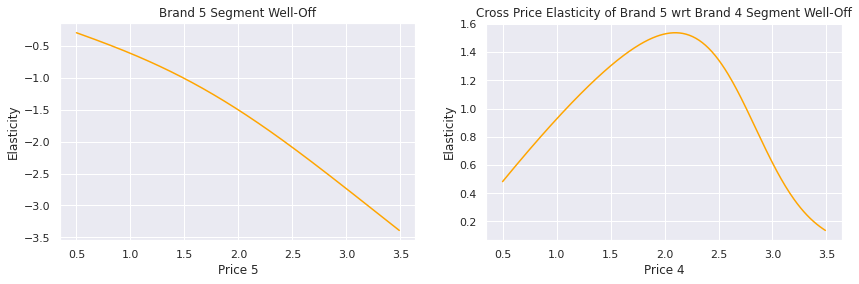

In [69]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')